In [9]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

In [157]:
V20=np.loadtxt(r'C:\Users\Physlab310\Desktop\Charulata and Nathan\2025-04-25_Ge_-10C\Vavg.txt')
I20=np.loadtxt(r'C:\Users\Physlab310\Desktop\Charulata and Nathan\2025-04-25_Ge_-10C\Iavg.txt')

Ierr = np.zeros_like(I20) # Defining errors based on data table from K6487 manual
for i in range(len(I20)):
    if I20[i] > 1e-2:
        Ierr[i] = I20[i]*0.1 + 1e-6
    elif (I20[i] > 1e-3) & (I20[i] < 1e-2):
        Ierr[i] = I20[i]*0.1 + 1e-7
    elif (I20[i] > 1e-4) & (I20[i] < 1e-3):
        Ierr[i] = I20[i]*0.1 + 1e-8
    elif (I20[i] > 1e-5) & (I20[i] < 1e-4):
        Ierr[i] = I20[i]*0.1 + 1e-9
    elif (I20[i] > 1e-6) & (I20[i] < 1e-5):
        Ierr[i] = I20[i]*0.1 + 1e-10
    elif (I20[i] > 1e-7) & (I20[i] < 1e-6):
        Ierr[i] = I20[i]*0.1 + 1e-11
    elif (I20[i] > 1e-8) & (I20[i] < 1e-7):
        Ierr[i] = I20[i]*0.15 + 1e-12
    elif (I20[i] > 1e-9) & (I20[i] < 1e-8):
        Ierr[i] = I20[i]*0.15 + 1e-13
    elif (I20[i] > 1e-10) & (I20[i] < 1e-9):
        Ierr[i] = I20[i]*0.2 + 1e-14
    else:
        Ierr[i] = I20[i]*0.3 + 1e-15

In [153]:
def I(V,Eg,C):
    k = 8.617e-5 # Boltzman Constant in Ev/K
    q = 1.0 # Charge of electron in Ev
    T = 263.15 # Temperature of data in K
    return C * T**(3/2) * np.exp(-Eg/(k*T)) * (np.exp((q*V)/(k*T)) - 1)

[  0.688142   119.20355359]
[1.24207120e+05 6.54436423e+08]


C:\Users\Physlab310\AppData\Local\Temp\ipykernel_9864\3733030949.py:5: RuntimeWarning: overflow encountered in exp
  return C * T**(3/2) * np.exp(-Eg/(k*T)) * (np.exp((q*V)/(k*T)) - 1)


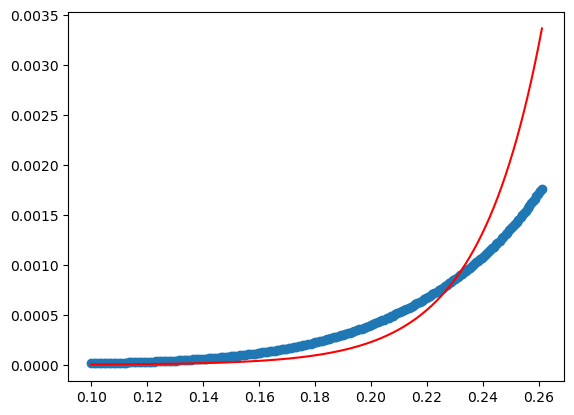

In [177]:
popt, pcov = opt.curve_fit(I, V20, I20, p0=[0.7, 50], sigma=Ierr)

plt.scatter(V20,I20)
plt.plot(V20, I(V20, *popt), color='r')

perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)
